## Threshold figure

Goal: To compare to the moisture/SST combination figure that leads to the positive BTD signal.
* this will need to be updated, depending on the settings used in MODEL_FLC

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Using estimated ranges of temperature:

In [2]:
sst = np.linspace(280, 300, 21)
moist_air_temp = np.linspace(280, 300, 21)

In [3]:
AIR_T, SST = np.meshgrid(moist_air_temp, sst)

MODEL FCLI V2 is simply the temperature difference using the most moist layer:

In [4]:
T_diff = AIR_T-SST

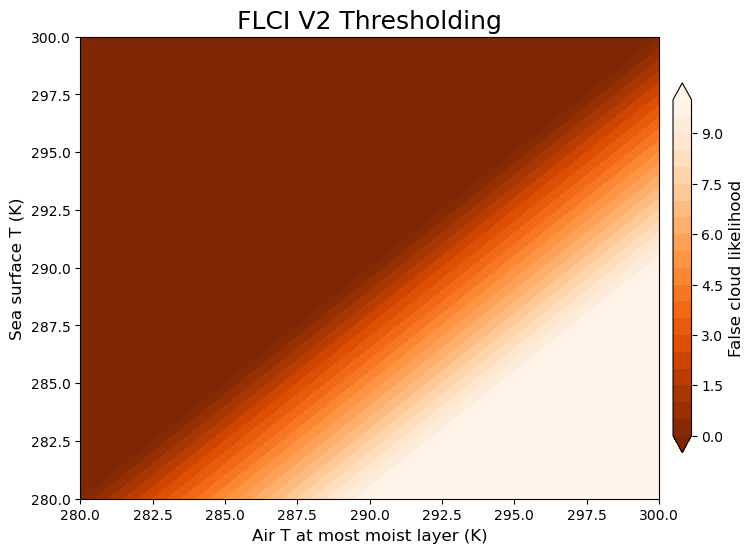

In [5]:
fig,ax=plt.subplots(1, figsize=(9,6))
cmap = plt.cm.Oranges_r
levels = np.linspace(-0, 10, 21)

c=ax.contourf(moist_air_temp, sst, T_diff, cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.8, pad=0.02, ax=ax)
ax.set_title('FLCI V2 Thresholding', fontsize=18)
ax.set_ylabel('Sea surface T (K)', fontsize=12)
ax.set_xlabel('Air T at most moist layer (K)', fontsize=12)
clb.set_label('False cloud likelihood', fontsize=12)
plt.savefig('threshold_figures/flci_v2.png', dpi=200, bbox_inches='tight')

MODEL FLCI V1 uses a vertically-averaged temperature difference, multiplied by a vertically-averaged moisture parameter:
* resource for making 3d plot: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [6]:
from mpl_toolkits import mplot3d

Can use the same temperatures as above, but need new humidity variable:

In [7]:
q = np.linspace(0,0.016,21)

Q = np.meshgrid(q, q)
Q=Q[0]

In [8]:
FLCI = T_diff*Q

In [9]:
np.min(FLCI)

-0.08

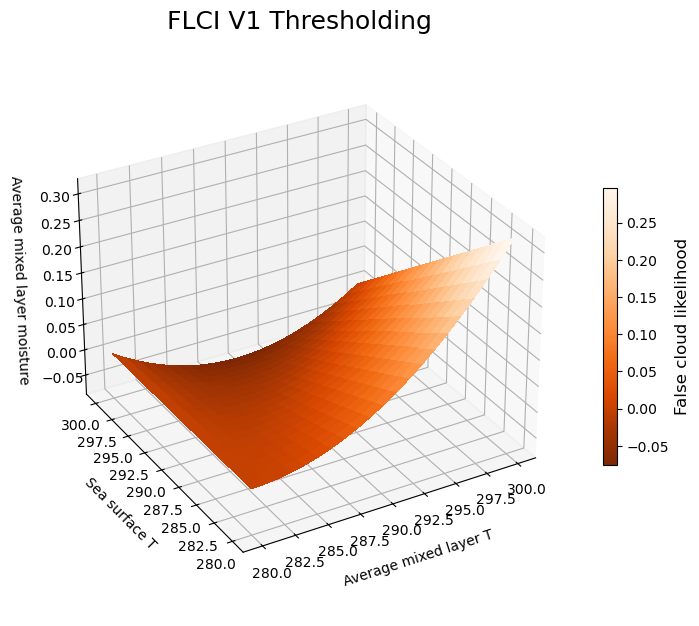

In [11]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
#--- viewing angle
ax.view_init(30, 240)
#--- distance, so labels aren't cropped
ax.set_box_aspect(aspect=None, zoom=0.9)

surf = ax.plot_surface(AIR_T, SST, FLCI, rstride=1, cstride=1, cmap='Oranges_r', edgecolor='none', antialiased=False)
clb = plt.colorbar(surf, shrink=0.4, pad=0.02, ax=ax)
ax.set_title('FLCI V1 Thresholding', fontsize=18)
ax.set_xlabel('Average mixed layer T', labelpad=10)
ax.set_ylabel('Sea surface T', labelpad=10)
ax.set_zlabel('Average mixed layer moisture', labelpad=10)
clb.set_label('False cloud likelihood', fontsize=12)
plt.savefig('threshold_figures/flci_v1.png', dpi=200, bbox_inches='tight')